Loading the saved model

In [6]:
from keras.models import model_from_json
import imageio, math, numpy as np

def load_model(model, weights):
    json_file = open(model, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(weights)

    return loaded_model

2023-12-06 19:12:47.346268: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


function for formatting the test images

In [8]:
def format_images(image):

    #Format the pictures to (480,480,3) by padding them with the edge values
    if (image.shape[0] > 480 and image.shape[1] <= 480):
        image = image[:480, :, :]
    elif (image.shape[0] <= 480 and image.shape[1] > 480):
        image = image[:, :480, :]
    elif (image.shape[0] > 480 and image.shape[1] > 480):
        image = image[:480, :480, :]
        return image

    else:
        pass

    height = 480 - image.shape[0]
    width = 480 - image.shape[1]

    if(height % 2 == 1 & width % 2 == 1):
        height1,height2 = math.floor(height/2), math.floor(height/2) + 1
        width1,width2 = math.floor(width/2), math.floor(width/2) +1
    elif(width % 2 == 1):
        width1,width2 = math.floor(width/2), math.floor(height/2) + 1
        height1,height2 = int(height/2), int(height/2)
    elif(height % 2 == 1):
        height1,height2 = math.floor(height/2), math.floor(height/2) + 1
        width1,width2 = int(width/2), int(width/2)
    else:
        height1,height2 = int(height/2), int(height/2)
        width1,width2 = int(width/2), int(width/2)

    if(height == 0):
        image = np.lib.pad(image, ((0,0),(width1, width2),(0,0)), 'edge')
    elif (width == 0):
        image = np.lib.pad(image, ((height1, height2),(0,0),(0,0)), 'edge')
    else:
        image = np.lib.pad(image, ((height1, height2),(width1, width2),(0,0)), 'edge')




    return image


Inference function

In [14]:
import matplotlib.pyplot as plt
def predict_and_draw(image, model):
    X_img = imageio.v2.imread(image)
    x = format_images(X_img)

    plt.imshow(x)
    x.shape = (1, ) + x.shape   # reshape x to (1, 480, 480, 3)
    x = x / 255.0               # rescale
    p_edible = model.predict(x).round(3)

    if p_edible < 0.50:
        title = "P: {} -> Mushroom is not edible".format(p_edible)
    else:
        title = "P: {} -> Mushroom is edible".format(p_edible)

    plt.title(title)
    plt.show()

In [10]:
model = load_model(model='model.json', weights='weights.h5')

1/1 [==============================] - 0s 131ms/step


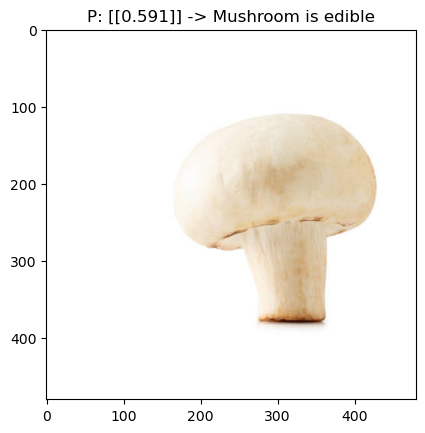

In [15]:
predict_and_draw(image='mush.jpeg', model=model)